# Data Visualization Tutorial

In this tutorial, we are going to take a look at the data visualization functions available to you in BastionLab and how to use them.

## Data Loading

!! Pre-requisite : download the train.csv dataset from: https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/data and save it in the same directory as this file. This is one of the most popular datasets used for understanding machine learning. It contains information relating to the passengers aboard the Titanic.

The first step is to get a RemoteLazyFrame instance of the dataset we are going to work with. In a typical workflow, the data owner would upload a dataset to the server and then the data owner would then recover a RemoteLazyFrame instnace of that dataset, but for the sake of this tutorial, we are going to send a locally stored dataset to the server and recover the RemoteLazyFrame instance of that dataset directly from the send() function.

In [5]:
! pip install polars
! pip install bastionlab

Obtaining file:///home/lauro1/mithril/bastionlab/client
  Installing build dependencies ... 

In [6]:
import polars as pl
from bastionlab import Connection

df = pl.read_csv("train.csv")

connection = Connection("localhost", 50056)
client = connection.client

rdf = client.send_df(df)

rdf

FetchableLazyFrame(identifier=3babfdbe-f5c6-415c-92f5-5ad1f6f100f2)

The dataset we are using for this tutorial is the classic Titanic dataset. 
Here, I will list the columns just to give you an idea of the data we will be handling in this turotial.

In [7]:
rdf.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

## Histplot

So now let's take a look at the first of our three data visualization options, histplot:

The histplot function two mandatory arguments, the x and y columns to be displayed, followed by a list of optional arguments. 

Barplot selects data from the X and Y columns, filters out any null values, groups the data into "bins" and then uses Seaborn's barplot function to display data. Thus, barplot can be given any of the optional arguments listed in the Seaborn documentation [here](https://seaborn.pydata.org/generated/seaborn.barplot.html).

The size of bins can be modified when calling the barplot function using "bins=X", however, BastionLab will check that the bin value still upholds a suitable level of data anonymity before allowing the query.

Let's take a look at a simple example. Here, I create a histogram to show the number of survivors per age group (from 0-90, grouped into bins of 10).

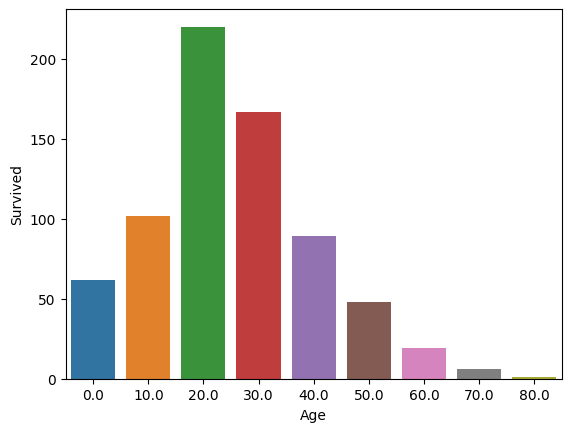

In [8]:
rdf.histplot("Age", "Survived", bins=10)

As outlined earlier, I can easily change the value of bins or add additional arguments accepted by sns.barplot to modify the output.

In [ ]:
rdf.histplot("Age", "Survived", bins=5, palette="bright")

## Scatterplot

The scatterplot works similarly to the barplot function and accepts the same optional arguments as Seaborn's scatterplot function which can be found [here](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

Again, a default bins of 5 is applied and can be modified when calling the scatterplot function.

Here, I will plot the same relationsip as in the previous histogram using the scatterplot function, but I will split the dataset into a male and females dataset and then give the two groups a different color so that we can differentiate between them on the plot.

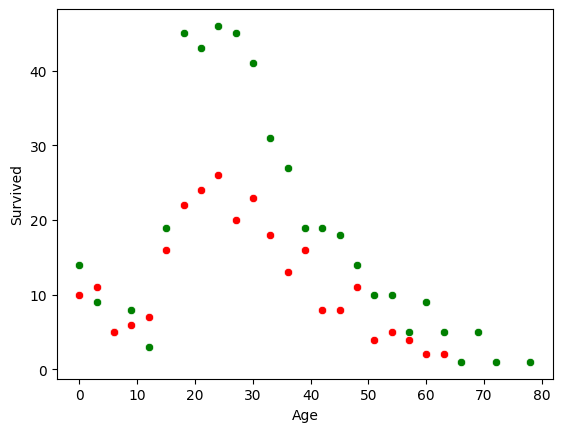

In [9]:
# apply filter to collect only females data entries
females_rdf = rdf.filter(pl.col("Sex") == "female")

# apply filter to collect only males data entries
males_rdf = rdf.filter(pl.col("Sex") == "male")

males_rdf.scatterplot("Age", "Survived", bins=3, color="green")
females_rdf.scatterplot("Age", "Survived", bins=3, color="red")

## Curveplot

The curveplot creates a regression best-fit curve visualization of the dataset based on Seaborn's regplot function. 

curveplot has mandatory col_x and col_y parameters and then accepts the same optional arguments as Seaborn's regplot function which can be found [here](https://seaborn.pydata.org/generated/seaborn.regplot.html).

A default bins of 10 is applied, as well as default ci=None, scatter=False and order=3 values, all of which can be modified when calling the curveplot function.


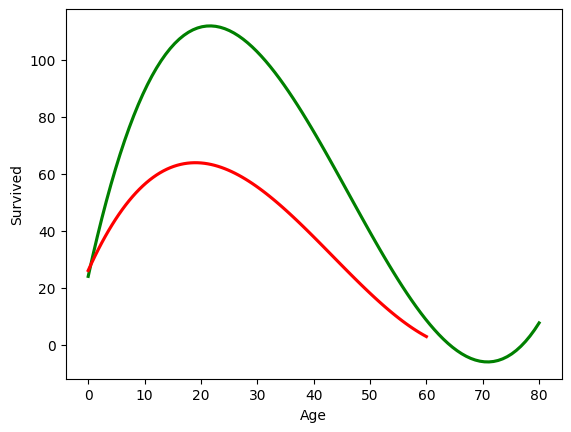

In [10]:
males_rdf.curveplot(col_x="Age", col_y="Survived", bins=10, color="green")
females_rdf.curveplot(col_x="Age", col_y="Survived", bins=10, color="red")

And finally, we will close the conection to the server.

In [ ]:
connection.close()